In [1]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

PART 1 ---> READING DATA

In [2]:
mat = scipy.io.loadmat('Speech_Dataset.mat')

In [3]:
data = pd.DataFrame(np.hstack((mat['X'], mat['y'])))

In [4]:
data.shape

(3686, 401)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-0.35069,0.52721,-1.62470,-1.334000,-1.03020,1.24750,-0.98067,-1.55870,-0.061233,1.048200,...,0.570960,-1.19840,2.168600,-0.30353,1.21620,-0.607070,0.503820,-0.45571,0.86283,1.0
1,-0.42537,-0.08818,0.84575,0.881570,1.35690,0.74894,-1.68620,0.46151,0.585700,0.775950,...,-0.582980,-0.35666,-0.638000,0.64106,-0.94488,-1.069700,-0.024029,0.28696,-0.12374,1.0
2,-1.22100,0.43960,-0.06303,0.709530,0.95079,-0.21874,-1.24850,-1.62860,-1.339700,-1.858500,...,-0.042742,2.77110,1.549400,-1.75680,-0.91595,-0.078469,0.097137,-0.55111,0.69951,1.0
3,-0.30132,0.55221,0.13769,0.715290,0.99311,-0.16959,-0.93405,-0.94825,-0.750880,0.003107,...,-0.103520,2.53710,2.096000,-1.43680,-1.05230,-0.070276,-0.539810,-1.10380,0.70562,1.0
4,0.31292,0.42762,0.50348,0.005489,-0.94274,-0.17619,-0.50775,-0.46445,0.694750,0.376040,...,1.060700,1.39660,0.096776,-1.18360,-0.37802,0.357150,1.278600,-0.40139,0.11640,1.0


In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
count,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,...,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000
mean,-0.188575,0.107037,0.219898,0.206612,-0.115817,-0.095439,-0.113868,0.046240,0.233740,-0.044152,...,-0.149239,0.296326,0.557432,-0.145117,-0.435184,0.438046,0.586747,-0.064219,0.130986,0.016549
std,0.901015,0.901404,0.936899,0.895852,0.895765,0.943162,0.910757,0.926262,0.919570,0.923802,...,0.920863,0.915269,0.911396,0.920086,0.934912,0.866462,0.867613,0.927555,0.916988,0.127592
min,-3.469200,-3.719800,-3.875100,-3.218200,-3.346300,-3.599800,-3.855300,-3.184600,-3.474800,-3.644400,...,-3.403900,-3.170200,-3.418000,-3.376900,-4.053700,-2.544200,-2.670900,-4.101100,-3.296500,0.000000
25%,-0.788600,-0.496418,-0.397657,-0.386063,-0.701532,-0.724618,-0.720637,-0.571275,-0.357603,-0.644182,...,-0.739247,-0.311830,-0.017492,-0.736085,-1.037450,-0.125835,0.011928,-0.668247,-0.487723,0.000000
50%,-0.174210,0.107395,0.228820,0.216445,-0.137480,-0.089343,-0.117650,0.031800,0.249060,-0.036156,...,-0.135195,0.305585,0.575075,-0.123550,-0.447070,0.446600,0.600110,-0.068339,0.146565,0.000000
75%,0.411350,0.706110,0.858812,0.788850,0.451338,0.545453,0.477353,0.665837,0.842523,0.572547,...,0.466985,0.912740,1.163250,0.460092,0.178653,0.989580,1.175500,0.556465,0.729015,0.000000
max,3.356500,3.517400,3.316600,3.400600,3.225100,3.862600,3.561200,3.292200,4.182100,3.892400,...,3.102300,3.845100,3.528500,3.002800,2.914500,3.427200,3.575200,3.694500,3.478200,1.000000


In [7]:
columns = data.columns[1:400]
X = data[columns]
X

,1,2,3,4,5,6,7,8,9,10,...,390,391,392,393,394,395,396,397,398,399
0,0.52721,-1.62470,-1.334000,-1.03020,1.247500,-0.98067,-1.558700,-0.061233,1.048200,0.207820,...,0.437720,0.570960,-1.19840,2.168600,-0.30353,1.21620,-0.607070,0.503820,-0.45571,0.86283
1,-0.08818,0.84575,0.881570,1.35690,0.748940,-1.68620,0.461510,0.585700,0.775950,-0.345210,...,-0.016239,-0.582980,-0.35666,-0.638000,0.64106,-0.94488,-1.069700,-0.024029,0.28696,-0.12374
2,0.43960,-0.06303,0.709530,0.95079,-0.218740,-1.24850,-1.628600,-1.339700,-1.858500,-0.553810,...,1.985500,-0.042742,2.77110,1.549400,-1.75680,-0.91595,-0.078469,0.097137,-0.55111,0.69951
3,0.55221,0.13769,0.715290,0.99311,-0.169590,-0.93405,-0.948250,-0.750880,0.003107,-0.084403,...,1.172300,-0.103520,2.53710,2.096000,-1.43680,-1.05230,-0.070276,-0.539810,-1.10380,0.70562
4,0.42762,0.50348,0.005489,-0.94274,-0.176190,-0.50775,-0.464450,0.694750,0.376040,-0.241680,...,-1.317400,1.060700,1.39660,0.096776,-1.18360,-0.37802,0.357150,1.278600,-0.40139,0.11640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,0.41857,-0.41746,-0.454210,0.71168,-0.052522,-1.86610,0.220370,0.488910,-2.072700,-2.635200,...,-0.229240,-0.586100,1.47180,0.263640,-0.68870,-1.10260,0.467970,0.481060,-0.29457,0.55751
3682,1.46840,-0.28178,-1.411000,-0.91399,1.427700,0.68553,-0.549750,0.025032,0.857950,-0.890990,...,1.569100,0.575650,0.58935,2.316300,1.00600,-0.15520,-0.343240,-0.023543,-1.57520,-0.37716
3683,0.35538,-1.04010,0.292630,0.17207,-0.549300,-2.22700,0.111300,0.403860,0.000354,-0.043115,...,-2.006600,0.544540,2.01170,0.584910,-0.43648,-0.11118,0.197870,0.189580,1.04610,-0.30757
3684,-0.66785,1.04800,-1.569300,-0.65241,1.957500,0.45265,0.807050,0.601570,0.813750,-3.086300,...,-0.648440,-0.453780,-0.29842,-0.641800,0.49518,-2.56460,-0.708690,0.369670,-0.49249,-0.40257


In [8]:
X.shape

(3686, 399)

In [9]:
target = data.columns[400]
state = np.random.RandomState(42)
Y = data[target]
Y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3681    0.0
3682    0.0
3683    0.0
3684    0.0
3685    0.0
Name: 400, Length: 3686, dtype: float64

In [10]:
Y.shape

(3686,)

In [11]:
xData = X.values
xData

array([[ 0.52721 , -1.6247  , -1.334   , ...,  0.50382 , -0.45571 ,
         0.86283 ],
       [-0.08818 ,  0.84575 ,  0.88157 , ..., -0.024029,  0.28696 ,
        -0.12374 ],
       [ 0.4396  , -0.06303 ,  0.70953 , ...,  0.097137, -0.55111 ,
         0.69951 ],
       ...,
       [ 0.35538 , -1.0401  ,  0.29263 , ...,  0.18958 ,  1.0461  ,
        -0.30757 ],
       [-0.66785 ,  1.048   , -1.5693  , ...,  0.36967 , -0.49249 ,
        -0.40257 ],
       [-1.4562  , -0.19547 , -0.11029 , ...,  0.48754 , -0.1466  ,
        -0.76304 ]])

In [12]:
yData = Y.values
yData

array([1., 1., 1., ..., 0., 0., 0.])

PART 2 ---> DATA PREPROCESSING USING PCA

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.46619524, -1.96910048, -1.7199514 , ..., -0.09559343,
        -0.4221254 ,  0.7982032 ],
       [-0.21659881,  0.66809421,  0.75352765, ..., -0.70406792,
         0.37865813, -0.27782359],
       [ 0.36898926, -0.30202451,  0.5614609 , ..., -0.56439461,
        -0.52499039,  0.62007423],
       ...,
       [ 0.27554459, -1.34504251,  0.0960306 , ..., -0.45783154,
         1.19720042, -0.47832229],
       [-0.85976042,  0.88399521, -1.98264209, ..., -0.25023397,
        -0.46178341, -0.58193637],
       [-1.73445889, -0.44340364, -0.35379233, ..., -0.1143601 ,
        -0.08882771, -0.97509183]])

In [15]:
pca = PCA()
pca.fit_transform(X)

array([[ 2.05652082, -4.47290174,  1.43518655, ..., -0.07504068,
        -0.0790041 ,  0.06121516],
       [-0.42899908, -1.46171697, -1.20567359, ..., -0.18996269,
        -0.4800798 , -0.77545218],
       [-2.74190452, -1.56722893,  0.91051392, ...,  0.02691794,
         0.29519141,  0.03287623],
       ...,
       [ 0.26495519, -2.18895633,  3.866274  , ...,  0.66133441,
         0.14403892, -0.43084241],
       [-1.71251639, -0.29434789, -0.74534206, ...,  0.14572545,
         1.86107851,  0.27926461],
       [ 1.34953713, -0.26659193, -0.67283754, ..., -0.68115963,
         0.07848764,  1.13176824]])

PART 3 + 4 ---> ALGORITHMS AND DATA PRE-PROCESSING

ALGORITHM 1 - RANDOM FOREST CLASSIFIER 

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 

In [18]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

In [19]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9882459312839059


In [20]:
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

392    0.013456
290    0.011649
35     0.010868
328    0.009072
75     0.008931
         ...   
5      0.000208
240    0.000198
81     0.000181
51     0.000134
62     0.000055
Length: 399, dtype: float64

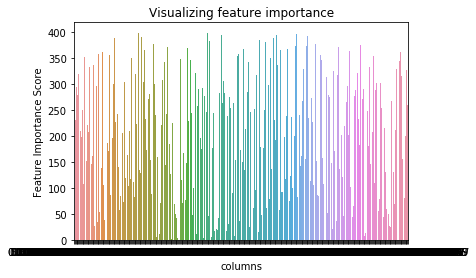

In [21]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('columns')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing feature importance")
plt.show()

In [22]:
## generating the model on selected feature
X=data[columns] 
Y                                       
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.70, random_state=5)

In [23]:
## generate a model on the selected training set features, perform predictions on the selected test set features, 
## and compare actual and predicted values

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9829523440526927


ALGORITHM 2 - K NEAREST NEIGHBOURS 

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [27]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[2537    0]
 [  44    0]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2537
         1.0       0.00      0.00      0.00        44

    accuracy                           0.98      2581
   macro avg       0.49      0.50      0.50      2581
weighted avg       0.97      0.98      0.97      2581



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

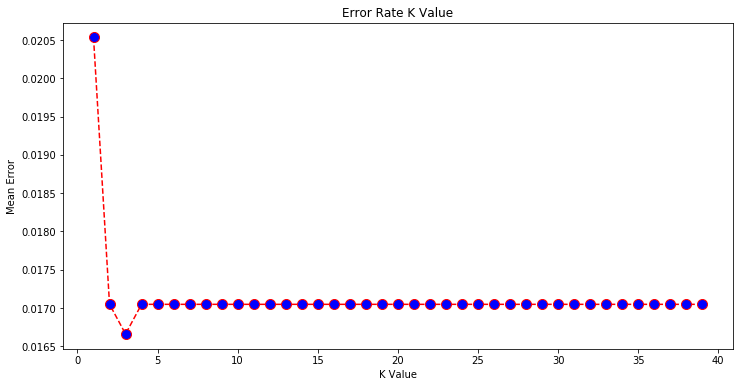

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

ALGORITHM 3 - LOGISTIC REGRESSION

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

In [34]:
train_data,test_data, train_label,test_label=train_test_split(X,Y,test_size=0.25)

In [35]:
train_data.shape, test_data.shape, train_label.shape, test_label.shape

((2764, 399), (922, 399), (2764,), (922,))

In [36]:
regressor= LogisticRegression()
regressor.fit(train_data, train_label)
predicted_test_label=regressor.predict(test_data)

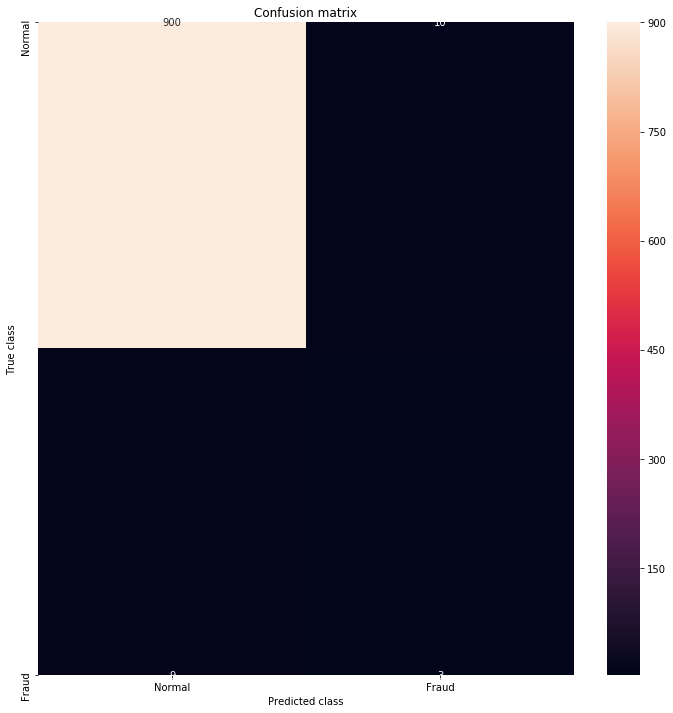

In [37]:
LABELS = ['Normal', 'Fraud'] 
confusion_matrix = metrics.confusion_matrix(test_label, predicted_test_label) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(confusion_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [38]:
print("Accuracy:",metrics.accuracy_score(test_label, predicted_test_label))
print("Precision:",metrics.precision_score(test_label, predicted_test_label))
print("Recall:",metrics.recall_score(test_label, predicted_test_label))

Accuracy: 0.9793926247288504
Precision: 0.23076923076923078
Recall: 0.25


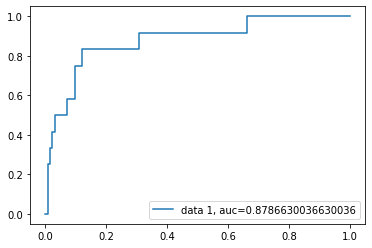

In [39]:
test_predictions= regressor.predict_proba(test_data)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_label,  test_predictions)
auc = metrics.roc_auc_score(test_label,  test_predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ALGORITHM 4 - SVM

In [40]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.datasets.samples_generator import make_blobs 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [41]:
clf = svm.SVC(kernel='linear',random_state=0) # Linear Kernel
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

In [42]:
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[2525   12]
 [  42    2]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2537
         1.0       0.14      0.05      0.07        44

    accuracy                           0.98      2581
   macro avg       0.56      0.52      0.53      2581
weighted avg       0.97      0.98      0.97      2581



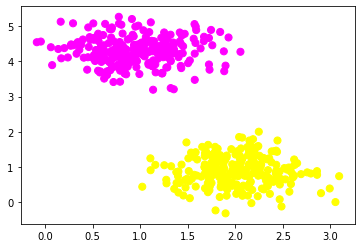

In [43]:
# creating datasets X containing n_samples 
# Y containing two classes 
X, Y = make_blobs(n_samples=500, centers=2, 
                  random_state=0, cluster_std=0.40) 
import matplotlib.pyplot as plt 
# plotting scatters  
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring'); 
plt.show() 

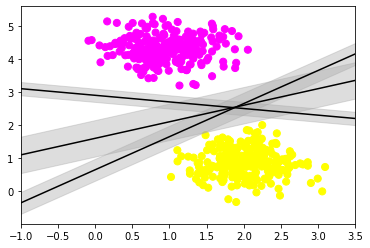

In [44]:
# creating line space between -1 to 3.5  
xfit = np.linspace(-1, 3.5) 
  
# plotting scatter 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring') 
  
# plot a line between the different sets of data 
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 
    yfit = m * xfit + b 
    plt.plot(xfit, yfit, '-k') 
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',  
    color='#AAAAAA', alpha=0.4) 
  
plt.xlim(-1, 3.5); 
plt.show() 

ALGORITHM 5 - DECISION TREE

In [45]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeRegressor

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [47]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, Y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [48]:
#With Gini-Index
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
clf_gini.fit(X_train, Y_train) 
clf_gini

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [49]:
#With entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5) 
clf_entropy.fit(X_train, Y_train) 
clf_entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [50]:
Y_pred = classifier.predict(X_test) 
print("Predicted values:") 
print(Y_pred) 
Y_pred 

Predicted values:
[1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0
 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 0]


array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [51]:
def prediction(X_test, clf_object): 
  
    Y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(Y_pred) 
    return Y_pred 

In [52]:
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred))

In [53]:
# Prediction using Gini-Index
Y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(Y_test, Y_pred_gini) 

Predicted values:
[1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0
 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 0]
Confusion Matrix:  [[79  0]
 [ 0 71]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        71

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [54]:
#Results Using Entropy 
Y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(Y_test, Y_pred_entropy) 

Predicted values:
[1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0
 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 0]
Confusion Matrix:  [[79  0]
 [ 0 71]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        71

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

